## Problem Statement:
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

### Domain Context  
Customer churn, in simple terms means that the customer has stopped doing business with the company
and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive
analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out.

## Import Necessary Libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
#Import Dataset
df=pd.read_csv(r'/content/customer_churn.csv')

In [173]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [174]:
#Dropping unnecessary column
df.drop(['customerID'],inplace=True,axis=1)

In [175]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Tasks to be done:

### A) Data Manipulation:
#### a. Find the total number of male customers

In [177]:
no_of_male=len(df[df['gender']=='Male'])
print(f"Total number of male customers : {no_of_male}")

Total number of male customers : 3555


#### b. Find the total number of customers whose Internet Service is ‘DSL’

In [178]:
internet_dsl=sum(df['InternetService']=='DSL')
print(f"Total number of customers whose Internet Service is 'DSL': {internet_dsl}")

Total number of customers whose Internet Service is 'DSL': 2421


#### c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’

In [179]:
new_customer=df[(df['SeniorCitizen']==1) & (df['gender']=='Female') & (df['PaymentMethod']=='Mailed check')]
new_customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,Female,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,Female,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,Female,1,No,No,19,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,Female,1,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No
694,Female,1,No,No,22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,No
747,Female,1,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No
947,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,Female,1,No,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


#### d. Extract all those customers whose tenure is less than 10 months or their Total charges is less  than 500 & store the result in ‘new_customer’

In [180]:
df["TotalCharges"]=df["TotalCharges"].replace(' ',np.nan)#Filling empty spaces with NAN

In [181]:
df.dropna(axis=0,inplace=True)#Dropping null values

In [182]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [183]:
df['TotalCharges']=df['TotalCharges'].astype('float')#Change data type to float

In [184]:
new_customer=df[(df['tenure']<10) | (df['TotalCharges']<500)]
new_customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### B) Data Visualization:
#### a. Build a pie-chart to show the distribution of customers would be churning out

In [185]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [186]:
names=df["Churn"].value_counts().keys().tolist()
names

['No', 'Yes']

In [187]:
sizes=df["Churn"].value_counts().tolist()
sizes

[5163, 1869]

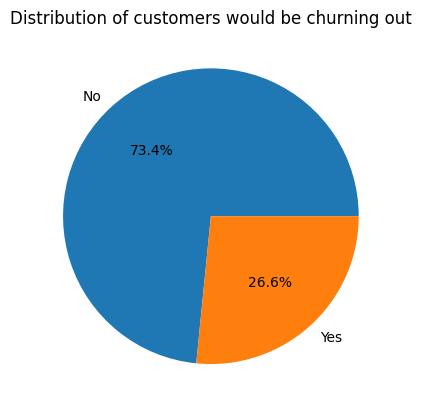

In [188]:
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.title('Distribution of customers would be churning out')
plt.show()

#### b. Build a bar-plot to show the distribution of ‘Internet Service’

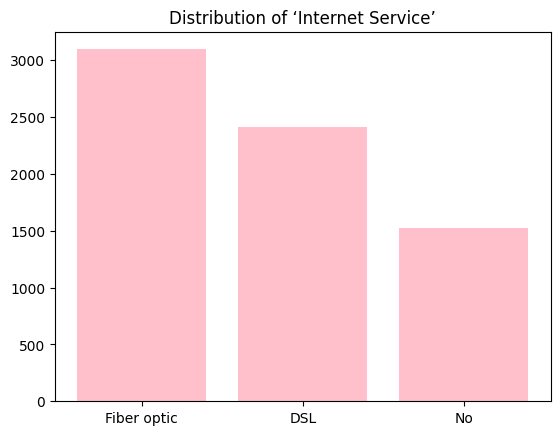

In [189]:
x=df["InternetService"].value_counts().keys().to_list()
y=df['InternetService'].value_counts().tolist()
#PLotting the bar plot
plt.bar(x,y,color='pink')
plt.title('Distribution of ‘Internet Service’')
plt.show()

### C) Model Building:
#### a. Build a sequential model using Keras, to find out if the customer would churn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
- i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
- ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
- iii.Use ‘Adam’ as the optimization algorithm
- iv.Fit the model on the train set, with number of epochs to be 150
- v.Predict the values on the test set and build a confusion matrix
- vi.Plot the ‘Accuracy vs Epochs’ graph

In [190]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [191]:
#Label Encoding all the columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])

In [192]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [193]:
x=df['tenure']
y=df['Churn']

In [194]:
#Dividing the dataset into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=6)

In [195]:
from keras.api.models import Sequential
from keras.layers import Dense

In [196]:
model=Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [197]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [198]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7286 - loss: 0.5544 - val_accuracy: 0.7556 - val_loss: 0.5091
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7304 - loss: 0.5275 - val_accuracy: 0.7556 - val_loss: 0.5092
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7614 - loss: 0.5182 - val_accuracy: 0.7556 - val_loss: 0.5090
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7358 - loss: 0.5337 - val_accuracy: 0.7556 - val_loss: 0.5090
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7606 - loss: 0.5022 - val_accuracy: 0.7556 - val_loss: 0.5096
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7548 - loss: 0.5187 - val_accuracy: 0.7556 - val_loss: 0.5090
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7609 - loss: 0.5039 - val_accuracy: 0.7556 - val_loss: 0.5096
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7493 - loss: 0.5214 - val_accuracy: 0.7556 

In [199]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413 (1.62 KB)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276 (1.08 KB)

In [200]:
mean_acc=np.mean(model.history.history['val_accuracy'])
print(f'The mean Accuracy is {mean_acc*100}')

The mean Accuracy is 75.56108717123668


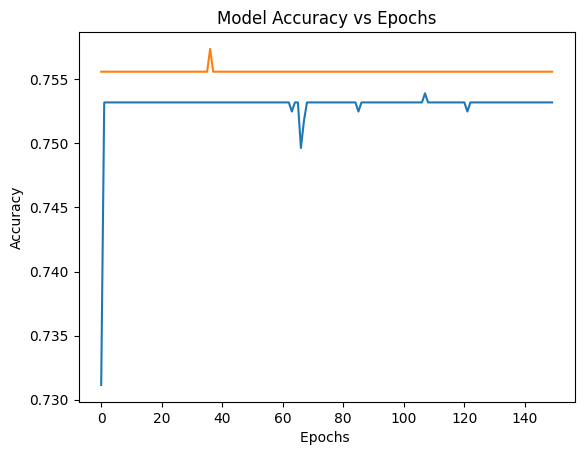

In [201]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model Accuracy vs Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs ")
plt.show()

In [202]:
 from sklearn.metrics import *
 cm_1=confusion_matrix(y_test,y_pred.round())
 cm_1

array([[3819,  318],
       [ 854,  635]])

### b. Build the 2nd model using same target and feature variables:
- i.Add a drop-out layer after the input layer with drop-out value of 0.3
- ii.Add a drop-out layer after the hidden layer with drop-out value of 0.2  
- iii.Predict the values on the test set and build a confusion matrix
- iv.Plot the ‘Accuracy vs Epochs’ graph




In [203]:
from keras.layers import Dropout

In [204]:
model2=Sequential()
model2.add(Dense(12,input_dim=1,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [205]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [206]:
model2.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2758 - loss: 5.3902 - val_accuracy: 0.2426 - val_loss: 1.2810
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3065 - loss: 2.4211 - val_accuracy: 0.4102 - val_loss: 0.7021
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5340 - loss: 1.1674 - val_accuracy: 0.7353 - val_loss: 0.5491
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5623 - loss: 1.1023 - val_accuracy: 0.7353 - val_loss: 0.5129
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6221 - loss: 0.9005 - val_accuracy: 0.7353 - val_loss: 0.5101
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6485 - loss: 0.7757 - val_accuracy: 0.7353 - val_loss: 0.5105
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6535 - loss: 0.7405 - val_accuracy: 0.7353 - val_loss: 0.5105
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6904 - loss: 0.6862 - val_accuracy: 0.7353 - 

In [207]:
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413 (1.62 KB)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276 (1.08 KB)

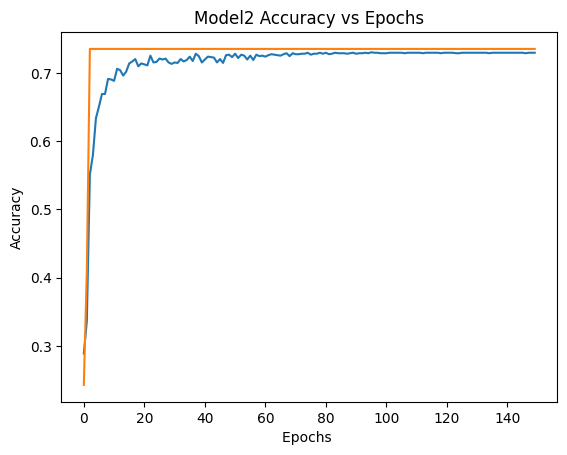

In [208]:
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title("Model2 Accuracy vs Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs ")
plt.show()

In [218]:
mean_acc2=np.mean(model2.history.history['val_accuracy'])
print(f'The mean Accuracy of model 2 is {mean_acc2*100}')

The mean Accuracy of model 2 is 72.98838782310486


In [210]:
cf_2=confusion_matrix(y_test,y_pred.round())
cf_2

array([[3819,  318],
       [ 854,  635]])

- By looking at this graph, we can infer that the validation accuracy is almost constantly 72.98%.
Now, this tells us that something is wrong with our model.  
- The best explanation for this is the drop-out percentage is very high for the input
layer and the hidden layer and thus the model which we have built might be underfitting
the data.

### c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:  
- i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
- ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
- iii. Use ‘Adam’ as the optimization algorithm
- iv. Fit the model on the train set, with number of epochs to be 150
- v. Predict the values on the test set and build a confusion matrix
- vi. Plot the ‘Accuracy vs Epochs’ graph







In [211]:
x1=df[['tenure','MonthlyCharges','TotalCharges']]
y1=df['Churn']

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=0.2,random_state=6)

In [221]:
model3=Sequential()
model3.add(Dense(12,input_dim=3,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2533 - loss: 952.9097 - val_accuracy: 0.2647 - val_loss: 413.5271
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2626 - loss: 278.3204 - val_accuracy: 0.2647 - val_loss: 33.8662
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4492 - loss: 10.6758 - val_accuracy: 0.7723 - val_loss: 0.8339
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7409 - loss: 0.5948 - val_accuracy: 0.7640 - val_loss: 0.5150
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7632 - loss: 0.4980 - val_accuracy: 0.7608 - val_loss: 0.4990
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7551 - loss: 0.4891 - val_accuracy: 0.7536 - val_loss: 0.4994
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7433 - loss: 0.5312 - val_accuracy: 0.7732 - val_loss: 0.5032
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7475 - loss: 0.5045 - val_accuracy: 0.7565 - val_

In [222]:
model3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 12)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

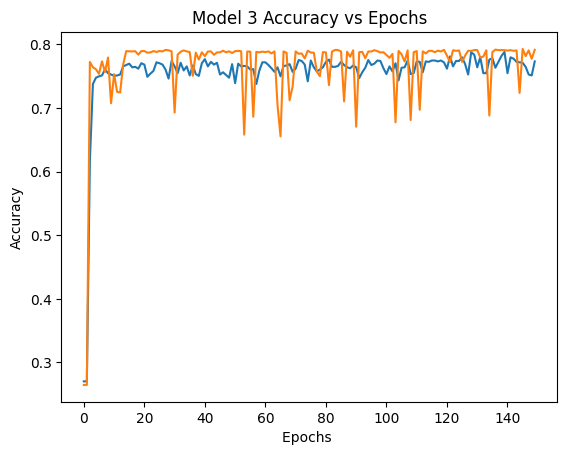

In [223]:
plt.plot(model3.history.history['accuracy'])
plt.plot(model3.history.history['val_accuracy'])
plt.title("Model 3 Accuracy vs Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs ")
plt.show()

In [224]:
model3_acc=np.mean(model3.history.history['val_accuracy'])
print(f'The Mean Accuracy of model3 is {(model3_acc*100)}')

The Mean Accuracy of model3 is 76.77106308937073


In [226]:
cf_3=confusion_matrix(y_test,y_pred.round())
cf_3

array([[3688,  449],
       [ 767,  722]])